# Data Mining Assignment 2

# Introduction

### Contextualizing the Problem

Data mining is an essential practice for uncovering patterns and insights from extensive datasets, enabling businesses to make informed, data-driven decisions. This approach is especially valuable in marketing, where understanding customer behavior can lead to more targeted campaigns and optimized resource allocation. This project aims to apply data mining to the marketing domain, specifically focusing on a sample dataset provided by a food retail company that offers various product categories through multiple sales channels. The primary objective is to develop a predictive model to maximize the efficiency and profitability of marketing campaigns.

The dataset at hand is derived from a pilot marketing campaign conducted by the company, involving 2,240 randomly selected customers. This pilot aimed to test the effectiveness of a marketing initiative promoting a new gadget, with results recorded as customer responses (purchases or non-purchases). Despite generating revenue from respondents, the overall campaign ran at a loss, with a negative profit of -3,046 monetary units (MU). This underscores the importance of leveraging data mining to predict and target likely respondents more accurately.

### Problem Statement

**Given the data from a sample marketing campaign, how can we accurately predict which customers are most likely to respond to future campaigns, and what insights can we derive to improve marketing strategies and profitability?**

`todo:` Add more research questions. CHECK THE TEMPLATE!!!!!

### Business Objectives and Value Proposition (Business Understanding)

The main goal is to build a robust predictive model that can identify customers most likely to respond to future campaigns. This will enable the marketing team to strategically target high-potential customers, enhancing campaign efficiency and profitability. Achieving this goal involves understanding the characteristics of past respondents and using this insight to refine future efforts. The success of this initiative is expected to justify the value of data-driven marketing strategies and contribute to sustained revenue growth.

Key business objectives include:

- Increasing Campaign Profitability: By accurately predicting respondents, the company can focus its marketing efforts on customers who are more likely to engage, minimizing costs and maximizing revenue.

- Customer Insight and Segmentation: Gaining a deeper understanding of customer behaviors and attributes that correlate with positive responses to marketing campaigns.

- Strategic Resource Allocation: Enabling the marketing team to allocate budget and resources more effectively.

### Data Mining Methodology: CRISP-DM Approach

To ensure a systematic and effective analysis, we will adopt the CRISP-DM (Cross-Industry Standard Process for Data Mining) framework. This method structures the project into six key phases:
<div style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/639px-CRISP-DM_Process_Diagram.png" alt="CRISP-DM Process" style="width:400px;height:400px;margin-top: 20px;">
</div>

1. Business Understanding: Define the project’s goals and success criteria, focusing on predicting customer responses and maximizing campaign profit. The aim is to ensure targeted marketing that improves the return on investment (ROI).

2.	Data Understanding: Explore the dataset, which includes socio-demographic and firmographic information about customers and their responses to the pilot campaign. This step will involve analyzing data distributions, correlations, and initial insights into what differentiates respondents from non-respondents.

3.	Data Preparation: Prepare the dataset for modeling by handling missing values, outliers, and data transformations. Categorical variables will be encoded, and numerical features will be scaled to enhance model performance. This phase also includes creating new features if necessary to capture additional insights (e.g., interaction terms between relevant variables).

4.	Modeling: Develop multiple predictive models, such as logistic regression, decision tree-based models, and ensemble methods (e.g., Random Forest). Train these models using a split of the data into training and test sets, followed by cross-validation and hyperparameter tuning for optimization.

5.	Evaluation: Assess the models based on key performance metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC. The goal is to select the best-performing model that aligns with the business objectives. Additionally, analyze potential biases or limitations in the model’s performance.

6.	Deployment: While deployment is beyond the scope of this initial analysis, successful implementation could lead to integrating the predictive model into the company’s marketing platform for real-time targeting and campaign management.

# ABOVE TEXT IS GOAT GENERATED WE NEED TO READ THROUGH IT AND MAKE SURE IT IS GOOD !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### Importing modules

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import warnings
import inflection
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)   

# This is the year the data was collected
DATA_YEAR = 2020

### Data Understanding

`todo:` Discuss potential challenges, limitations, and propose
solutions related to data quality, computational complexity, and data
mining techniques, and discuss approaches of how to tackle and
address them through your approach.

In [2]:
# First create the folder "data" and add the data source into it
def check_data_folder_dataset_load_df(dataset_csv_name="marketing_campaign.csv"):
    if not os.path.isdir("data"):
        raise Exception("there is no data folder ")
    if not os.path.exists(f"data/{dataset_csv_name}"):
        raise Exception(f"there is no {dataset_csv_name} in the data folder ")
    
    return pd.read_csv(f"data/{dataset_csv_name}", delimiter=";")
    
df = check_data_folder_dataset_load_df()
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  2012-09-04       58       635         88              546   
1            1  2014-03-08       38        11          1                6   
2            0  2013-08-21       26       426         49              127   
3            0  2014-02-10       26        11          4               20   
4            0  2014-01-19       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  2013-06-13       46       709         43              182   
2236         1  2014-06-10       56       406          0               30   
2237         0  2014-01-25       91       908         48              217   
2238         1  2014-01-24        8       428         30              214   
2239         1  2012-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

The dataset contains 29 columns and 2240 rows. The column descriptions can be found below:

1. ID - Customer’s id
2. Year_Birth - Customer’s year of birth
3. Education - Customer’s level of education
4. Marital_Status - Customer’s marital status
5. Income - Customer’s yearly household income
6. Kidhome - Number of small children in customer’s household
7. Teenhome - Number of teenagers in customer’s household
8. Dt_Customer - Date of customer’s enrolment with the company
9. Recency - Number of days since the last purchase
10. MntWines - Amount spent on wine products in the last 2 years
11. MntFruits - Amount spent on fruits products in the last 2 years
12. MntMeatProducts - Amount spent on meat products in the last 2 years
13. MntFishProducts - Amount spent on fish products in the last 2 years
14. MntSweetProducts - Amount spent on sweet products in the last 2 years
15. MntGoldProds - Amount spent on gold products in the last 2 years
16. NumDealsPurchases - Number of purchases made with discount
17. NumWebPurchases - Number of purchases made through company’s web site
18. NumCatalogPurchases - Number of purchases made using catalogue
19. NumStorePurchases - Number of purchases made directly in stores
20. NumWebVisitsMonth - Number of visits to company’s web site in the last month
21. AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
22. AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
23. AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
24. AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
25. AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
26. Complain - 1 if customer complained in the last 2 years, 0 otherwise
27. Z_CostContact - Cost to contact a customer
28. Z_Revenue - Revenue after client accepting campaign
29. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise

We can look at the descriptive statistics of the dataframe below:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

From this we can see that `Education`, `Marital_Status` and `Dt_customer` are non numeric values.

Now we can take a look at the descriptive statistics of the numerical values:

In [4]:
df.describe().transpose().round(2)

count      mean       std     min       25%      50%  \
ID                   2240.0   5592.16   3246.66     0.0   2828.25   5458.5   
Year_Birth           2240.0   1968.81     11.98  1893.0   1959.00   1970.0   
Income               2216.0  52247.25  25173.08  1730.0  35303.00  51381.5   
Kidhome              2240.0      0.44      0.54     0.0      0.00      0.0   
Teenhome             2240.0      0.51      0.54     0.0      0.00      0.0   
Recency              2240.0     49.11     28.96     0.0     24.00     49.0   
MntWines             2240.0    303.94    336.60     0.0     23.75    173.5   
MntFruits            2240.0     26.30     39.77     0.0      1.00      8.0   
MntMeatProducts      2240.0    166.95    225.72     0.0     16.00     67.0   
MntFishProducts      2240.0     37.53     54.63     0.0      3.00     12.0   
MntSweetProducts     2240.0     27.06     41.28     0.0      1.00      8.0   
MntGoldProds         2240.0     44.02     52.17     0.0      9.00     24.0   
NumDealsPurchases    2240.0      2.33      1.93     0.0      1.00      2.0   
NumWebPurchases      2240.0      4.08      2.78     0.0      2.00      4.0   
NumCatalogPurchases  2240.0      2.66      2.92     0.0      0.00      2.0   
NumStorePurchases    2240.0      5.79      3.25     0.0      3.00      5.0   
NumWebVisitsMonth    2240.0      5.32      2.43     0.0      3.00      6.0   
AcceptedCmp3         2240.0      0.07      0.26     0.0      0.00      0.0   
AcceptedCmp4         2240.0      0.07      0.26     0.0      0.00      0.0   
AcceptedCmp5         2240.0      0.07      0.26     0.0      0.00      0.0   
AcceptedCmp1         2240.0      0.06      0.25     0.0      0.00      0.0   
AcceptedCmp2         2240.0      0.01      0.11     0.0      0.00      0.0   
Complain             2240.0      0.01      0.10     0.0      0.00      0.0   
Z_CostContact        2240.0      3.00      0.00     3.0      3.00      3.0   
Z_Revenue            2240.0     11.00      0.00    11.0     11.00     11.0   
Response             2240.0      0.15      0.36     0.0      0.00      0.0   

                          75%       max  
ID                    8427.75   11191.0  
Year_Birth            1977.00    1996.0  
Income               68522.00  666666.0  
Kidhome                  1.00       2.0  
Teenhome                 1.00       2.0  
Recency                 74.00      99.0  
MntWines               504.25    1493.0  
MntFruits               33.00     199.0  
MntMeatProducts        232.00    1725.0  
MntFishProducts         50.00     259.0  
MntSweetProducts        33.00     263.0  
MntGoldProds            56.00     362.0  
NumDealsPurchases        3.00      15.0  
NumWebPurchases          6.00      27.0  
NumCatalogPurchases      4.00      28.0  
NumStorePurchases        8.00      13.0  
NumWebVisitsMonth        7.00      20.0  
AcceptedCmp3             0.00       1.0  
AcceptedCmp4             0.00       1.0  
AcceptedCmp5             0.00       1.0  
AcceptedCmp1             0.00       1.0  
AcceptedCmp2             0.00       1.0  
Complain                 0.00       1.0  
Z_CostContact            3.00       3.0  
Z_Revenue               11.00      11.0  
Response                 0.00       1.0

We can check for missing values in the dataset:

In [5]:
print("Missing data in the dataframe:")
print(df.isnull().sum())

Missing data in the dataframe:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


Since 1% of the columns have Null values in them, we can safely remove them:

In [6]:
df = df.dropna()

Now, for consistency sake we transform all column names into camelcase

In [7]:
df.columns = [inflection.underscore(col) for col in df.columns]
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1',
       'accepted_cmp2', 'complain', 'z_cost_contact', 'z_revenue', 'response'],
      dtype='object')

We can also check for the amount of unique values per column in our dataset, to see if maybe some data is redundant:

In [8]:
df.nunique()

id                       2216
year_birth                 59
education                   5
marital_status              8
income                   1974
kidhome                     3
teenhome                    3
dt_customer               662
recency                   100
mnt_wines                 776
mnt_fruits                158
mnt_meat_products         554
mnt_fish_products         182
mnt_sweet_products        176
mnt_gold_prods            212
num_deals_purchases        15
num_web_purchases          15
num_catalog_purchases      14
num_store_purchases        14
num_web_visits_month       16
accepted_cmp3               2
accepted_cmp4               2
accepted_cmp5               2
accepted_cmp1               2
accepted_cmp2               2
complain                    2
z_cost_contact              1
z_revenue                   1
response                    2
dtype: int64

From above we acn see `z_cost_contact` and `z_revenue` columns have only one value, as such we can drop those columns

In [9]:
df = df.drop(columns=['z_cost_contact', 'z_revenue'])

### Pairplot

In [10]:
# Selects response and continuous numeric columns with >3 unique values (e.g., excludes discrete variables like 'kidhome', 'teenhome'), ignoring 'id'
numerical_features = [col for col in df if col == 'response' or (df[col].dtype.kind in 'fi' and df[col].nunique() > 3) and col != 'id']

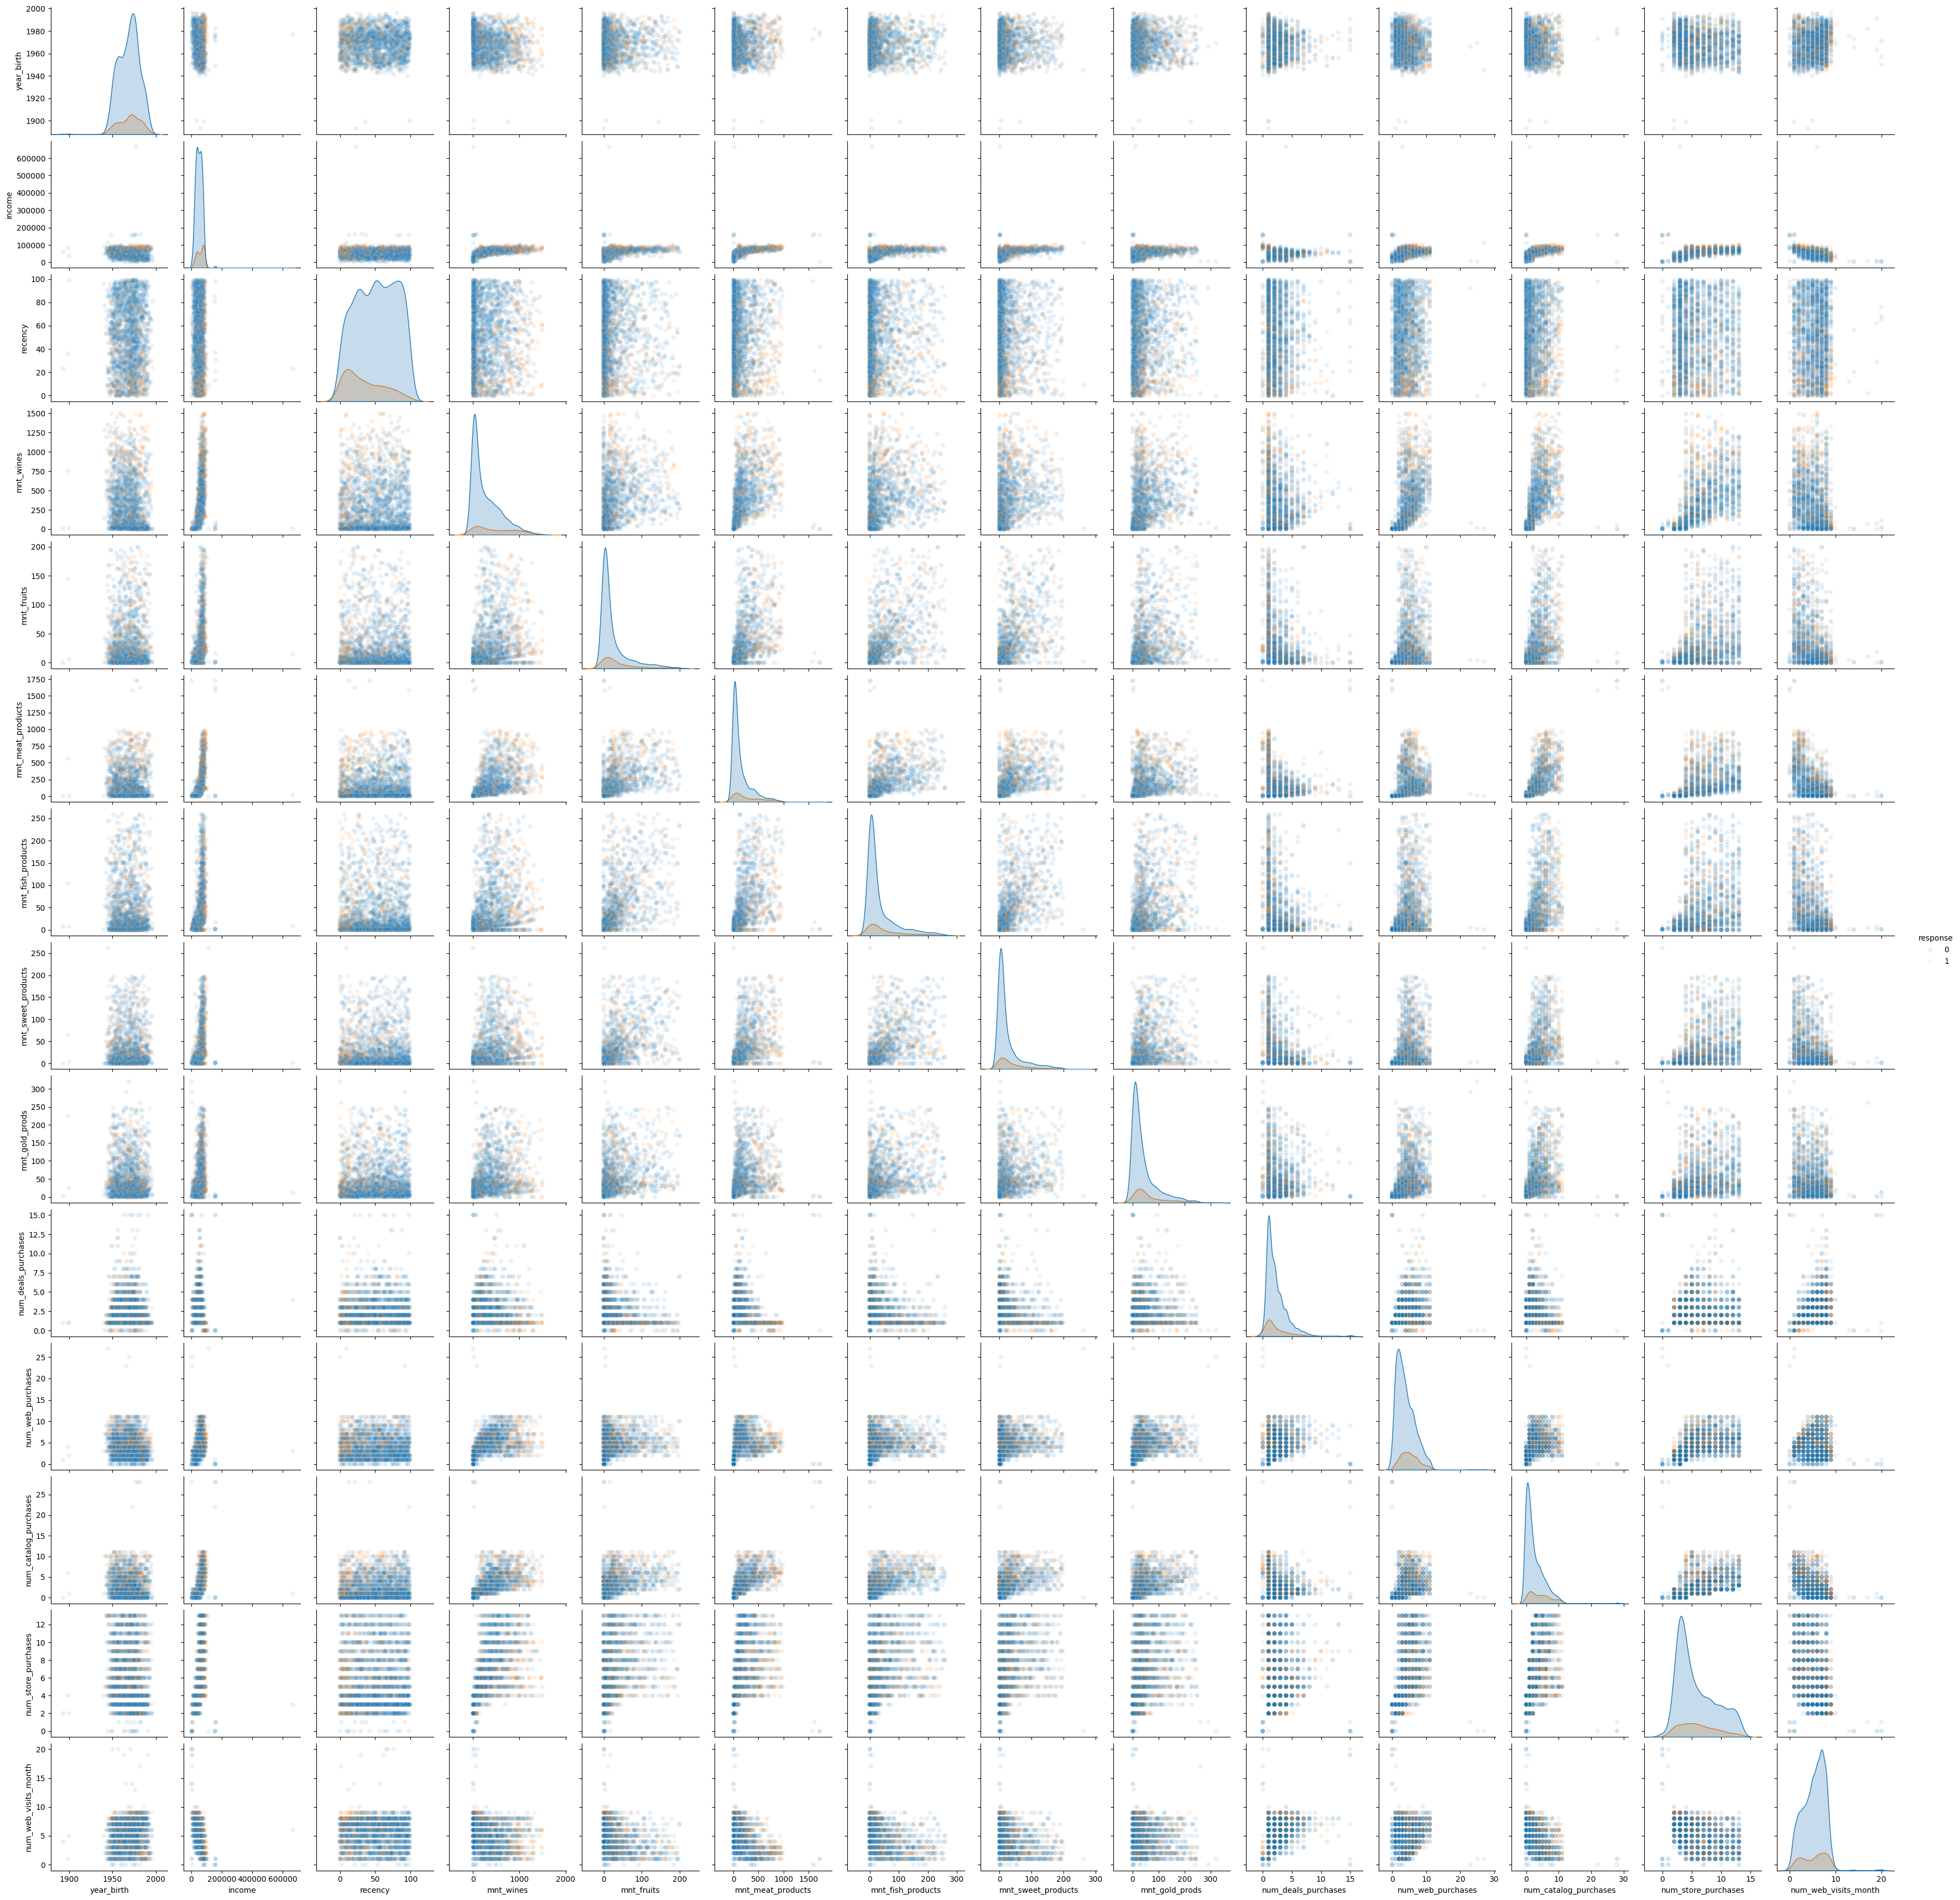

In [11]:
# Numerical Pairplot according to response variable
sns.pairplot(df[numerical_features], hue='response', plot_kws={'alpha':0.1})
plt.show()

`todo:` explain what is seen above

### Histogram

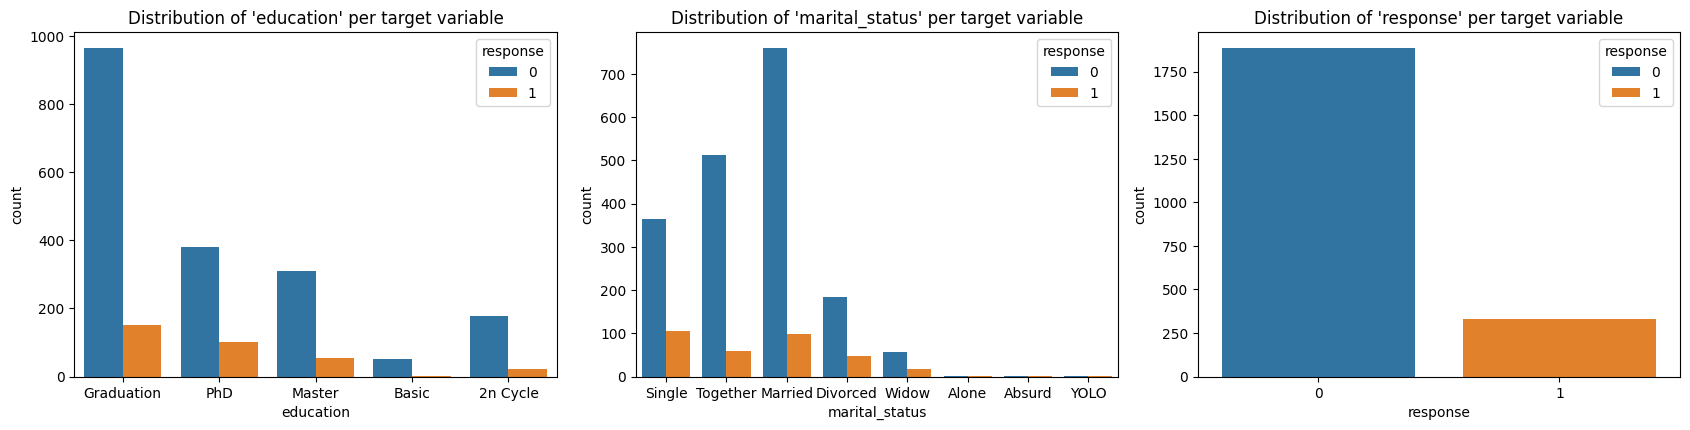

In [12]:
def create_histograms(df, columns, rows=1, cols=2):
    fig, axes = plt.subplots(rows, cols, figsize=(17, 8))
    axes = axes.flatten()  # Flatten to easily index in a loop

    for i, column in enumerate(columns):
        sns.countplot(data=df, x=column, hue='response', ax=axes[i])
        axes[i].set_title(f"Distribution of '{column}' per target variable")

    # Remove any empty subplots if there are fewer columns than grid spaces
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Example usage
df_categorical_variables = df[['education', 'marital_status', 'response']]
create_histograms(df_categorical_variables, df_categorical_variables.columns, rows=2, cols=3)

`todo:` explain

### Checking Outliers

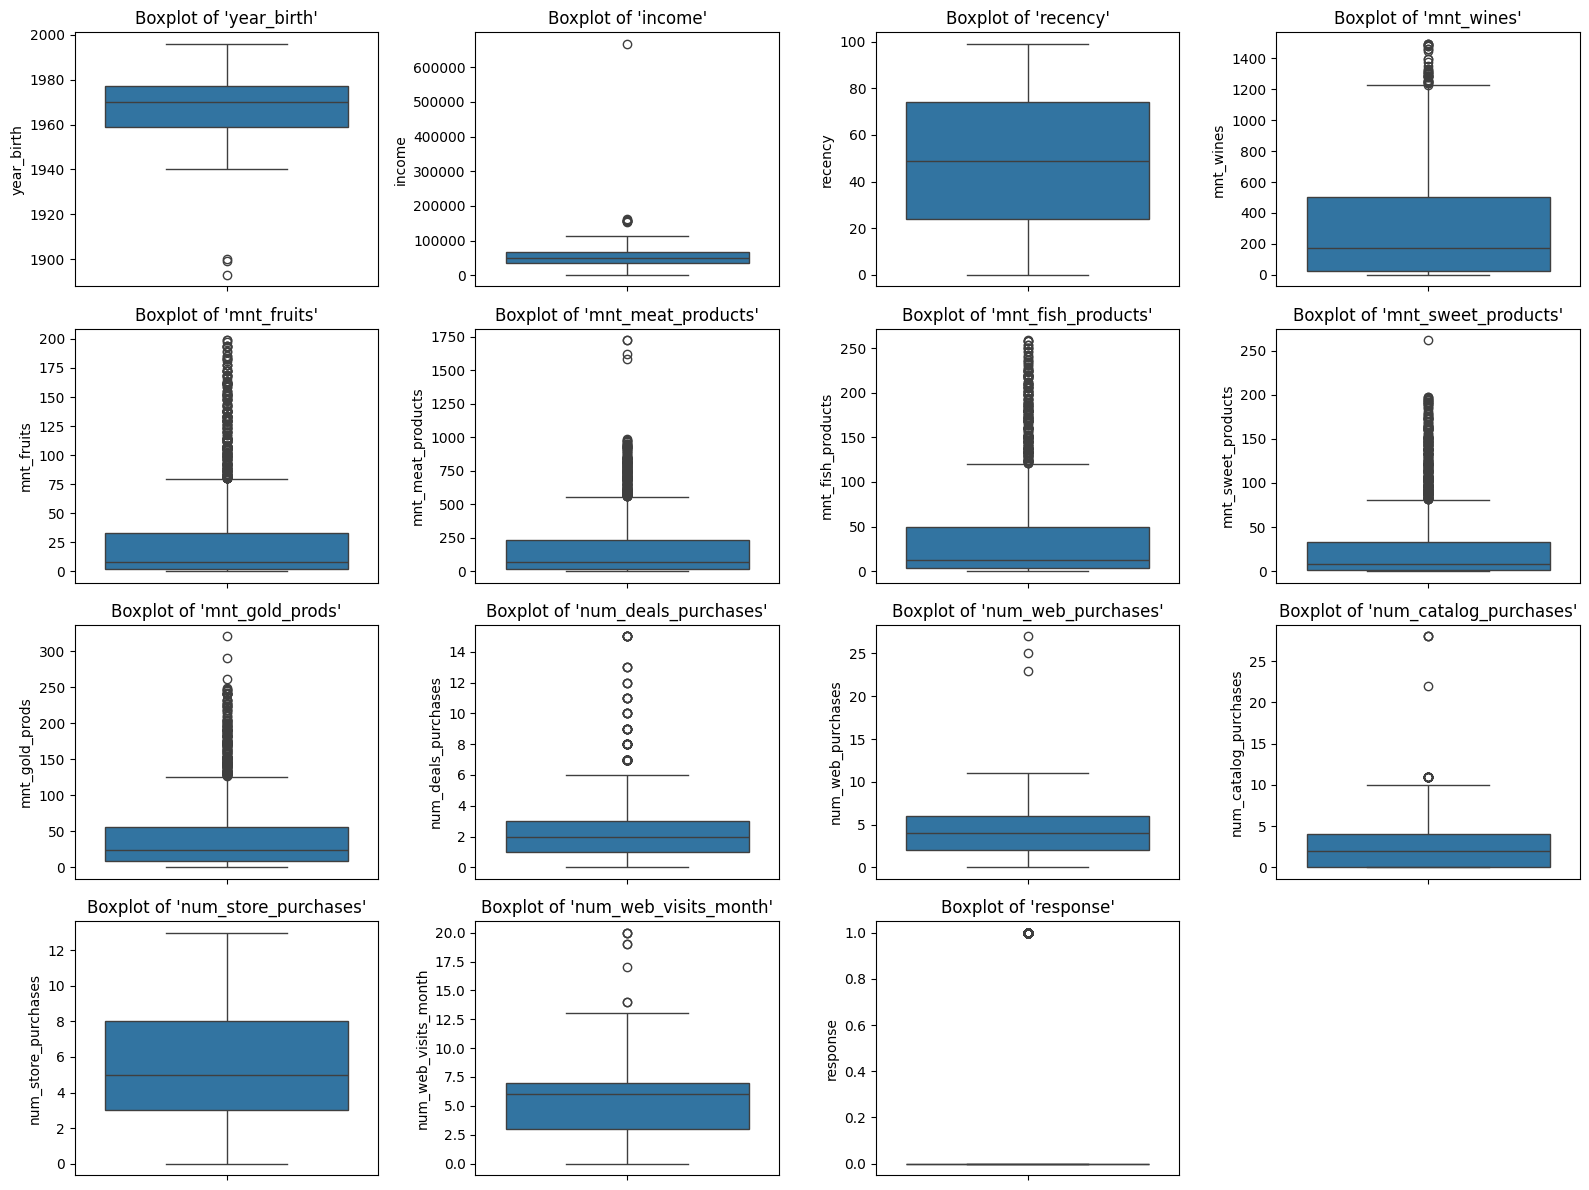

In [13]:
def create_boxplots(df, columns, rows=2, cols=2):
    fig, axes = plt.subplots(rows, cols, figsize=(rows*4, cols*3))
    axes = axes.flatten()  # Flatten to easily index in a loop

    for i, column in enumerate(columns):
        sns.boxplot(data=df, y=column, ax=axes[i])
        axes[i].set_title(f"Boxplot of '{column}'")

    # Remove any empty subplots if there are fewer columns than grid spaces
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

create_boxplots(df, numerical_features, rows=4, cols=4)

Looking at age and income, we can see age seems to be some data input limits. For income we also have some outliers that we could look at removing to let the models generalise better.

`todo:` motivate why we dont remove outliers from other classes

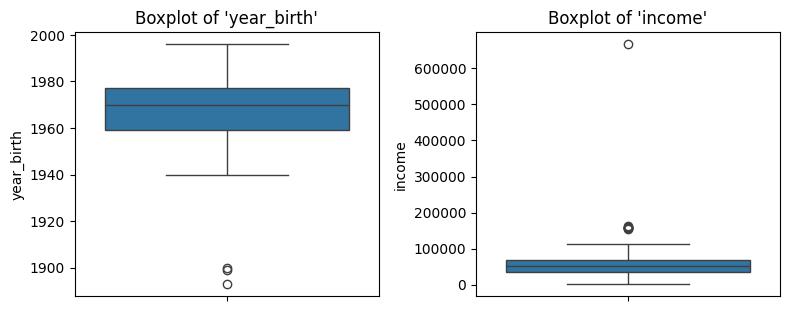

In [14]:
create_boxplots(df, ['year_birth', 'income'])

In [15]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[df[column] <= Q3 + 1.5 * IQR]
    return df

print("Number of rows before removing outliers:", df.shape[0])
df = remove_outliers(df, 'income')
df = remove_outliers(df, 'year_birth')
print("Number of rows after removing outliers:", df.shape[0])

Number of rows before removing outliers: 2216
Number of rows after removing outliers: 2208


### Feature Engineering

Lets add some extra information based on the dataset. 

In [16]:
# TODO: Motivate the need for the following columns

# Add a new column age to the dataset
df['age'] = DATA_YEAR - df['year_birth']

df['dt_customer'] = pd.to_datetime(df['dt_customer'], format='%Y-%m-%d')
df['years_as_customer'] = DATA_YEAR - df['dt_customer'].dt.year

# Add a new column to calculate the total amount spent by each customer for every product
df['total_spend'] = df['mnt_wines'] + df['mnt_fruits'] + df['mnt_meat_products'] + df['mnt_fish_products'] + df['mnt_sweet_products'] + df['mnt_gold_prods']

# Add a new column to calculate the total purchases made by each customer
df['total_purchases'] = df['num_deals_purchases'] + df['num_web_purchases'] + df['num_catalog_purchases'] + df['num_store_purchases']

# Add a new column to calculate the total number of campaign responses made by each customer
df['total_accepted_cpm'] = df['accepted_cmp1'] + df['accepted_cmp2'] + df['accepted_cmp3'] + df['accepted_cmp4'] + df['accepted_cmp5']

# Add a new column to check if the customer is a parent or not as a boolean
df['is_parent'] = ((df['kidhome'] > 0) | (df['teenhome'] > 0)).astype(int)

# Add a new column to split the marital status 
couple_status_mapping = {
    'Married': 1,
    'Together': 1,
    'Single': 0,
    'Divorced': 0,
    'Widow': 0,
    'Alone': 0,
    'Absurd': 0,
    'YOLO': 0
}
df['is_couple'] = df['marital_status'].map(couple_status_mapping)

# Create dummy variables for the 'education' column
education_dummies = pd.get_dummies(df['education'].str.lower(), prefix='education', drop_first=True)
df = pd.concat([df, education_dummies], axis=1)

df.head()

id  year_birth   education marital_status   income  kidhome  teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  dt_customer  recency  mnt_wines  mnt_fruits  mnt_meat_products  \
0  2012-09-04       58        635          88                546   
1  2014-03-08       38         11           1                  6   
2  2013-08-21       26        426          49                127   
3  2014-02-10       26         11           4                 20   
4  2014-01-19       94        173          43                118   

   mnt_fish_products  mnt_sweet_products  mnt_gold_prods  num_deals_purchases  \
0                172                  88              88                    3   
1                  2                   1               6                    2   
2                111                  21              42                    1   
3                 10                   3               5                    2   
4                 46                  27              15                    5   

   num_web_purchases  num_catalog_purchases  num_store_purchases  \
0                  8                     10                    4   
1                  1                      1                    2   
2                  8                      2                   10   
3                  2                      0                    4   
4                  5                      3                    6   

   num_web_visits_month  accepted_cmp3  accepted_cmp4  accepted_cmp5  \
0                     7              0              0              0   
1                     5              0              0              0   
2                     4              0              0              0   
3                     6              0              0              0   
4                     5              0              0              0   

   accepted_cmp1  accepted_cmp2  complain  response  age  years_as_customer  \
0              0              0         0         1   63                  8   
1              0              0         0         0   66                  6   
2              0              0         0         0   55                  7   
3              0              0         0         0   36                  6   
4              0              0         0         0   39                  6   

   total_spend  total_purchases  total_accepted_cpm  is_parent  is_couple  \
0         1617               25                   0          0          0   
1           27                6                   0          1          0   
2          776               21                   0          0          1   
3           53                8                   0          1          1   
4          422               19                   0          1          1   

   education_basic  education_graduation  education_master  education_phd  
0                0                     1                 0              0  
1                0                     1                 0              0  
2                0                     1                 0              0  
3                0                     1                 0              0  
4                0                     0                 0              1

We can now drop the redundant features:

In [17]:
df = df.drop(columns=['education', 'marital_status', 'year_birth', 'dt_customer'])

Now, checking the correlation:

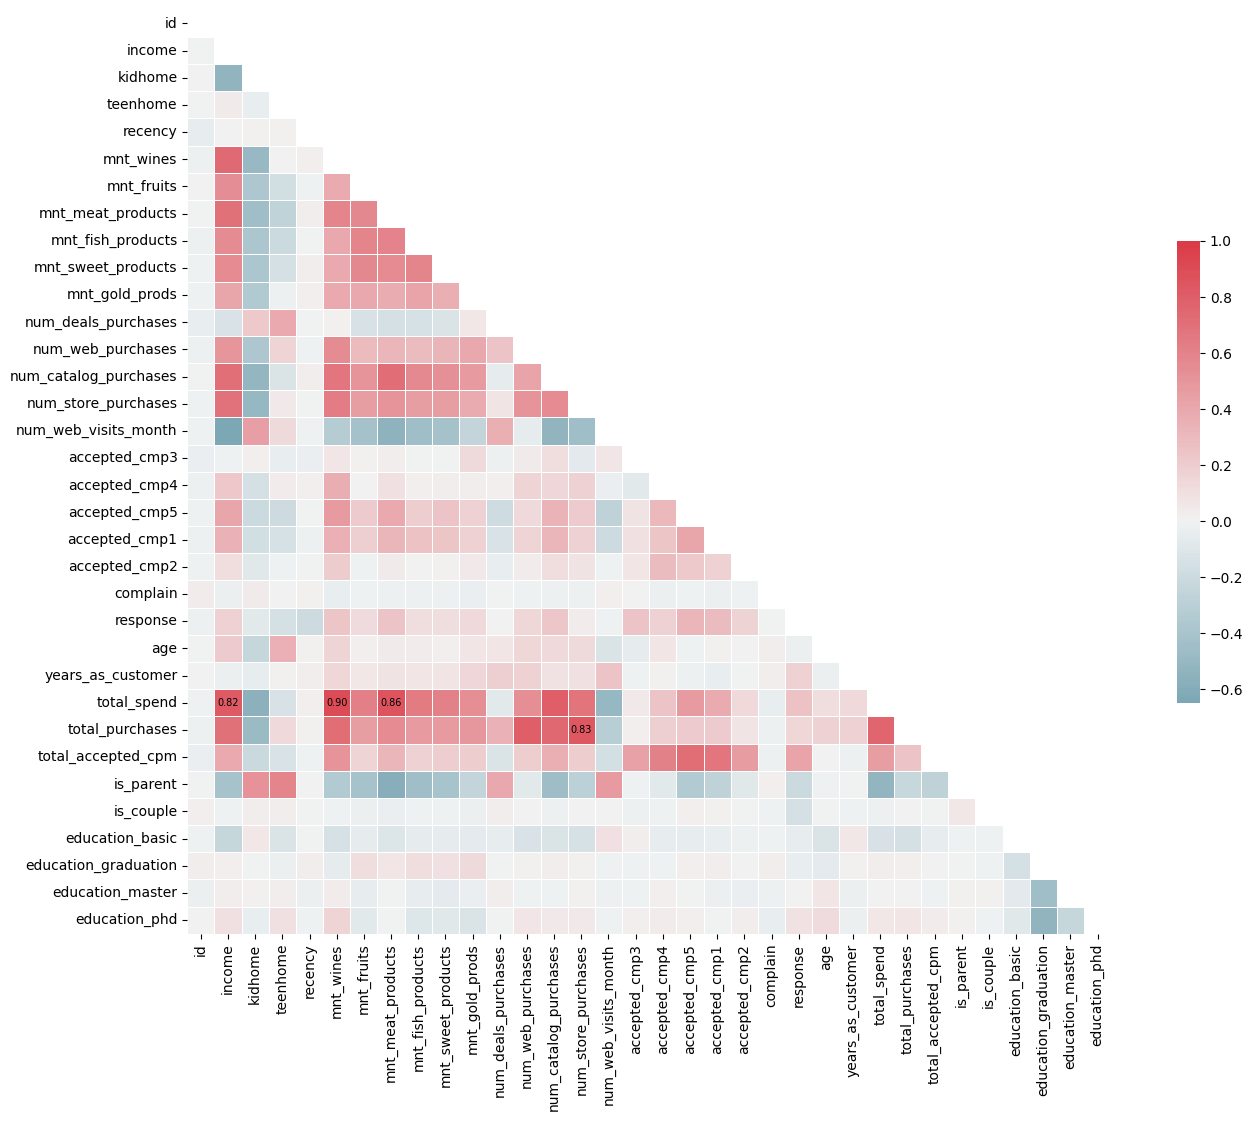

In [18]:
# Calculate corr
corr = df.corr()
# Mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
plt.figure(figsize=(17, 12))

# Create an annotation matrix with conditions for values above 0.8 or below -0.8
annot = corr.applymap(lambda x: f"{x:.2f}" if abs(x) >= 0.8 else "")

# Draw the heatmap with the mask, annotations, and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=annot, fmt="", annot_kws={"size": 7, "color": "black"})

plt.show()

`todo:` Resolve highly correlated variables found above

We can look at our target variable standalone.

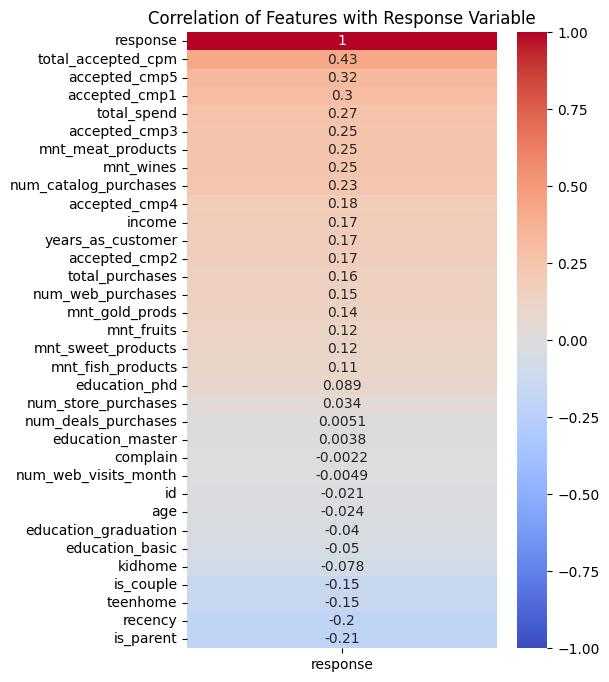

In [19]:
plt.figure(figsize=(5, 8))
sns.heatmap(corr[['response']].sort_values(by='response', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with Response Variable')
plt.show()

`todo:` Interpret

### Normalization and scaling step 


**WORK IN PROGRESS**

`todo:` Normalize/Standardize the data, explain what is going on

In [22]:
# Update to the numerical features
numerical_features = ['income', 'recency', 'mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 
                               'mnt_sweet_products', 'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases', 
                               'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month', 'age', 
                               'years_as_customer', 'total_spend', 'total_purchases']

# Initialise the scaler
scaler = MinMaxScaler()

# Apply the scaler to the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df.head()

id    income  kidhome  teenhome   recency  mnt_wines  mnt_fruits  \
0  5524  0.503625        0         0  0.585859   0.425318    0.442211   
1  2174  0.398325        1         1  0.383838   0.007368    0.005025   
2  4141  0.623933        0         0  0.262626   0.285332    0.246231   
3  6182  0.222456        1         0  0.262626   0.007368    0.020101   
4  5324  0.505009        1         0  0.949495   0.115874    0.216080   

   mnt_meat_products  mnt_fish_products  mnt_sweet_products  mnt_gold_prods  \
0           0.316522           0.664093            0.335878        0.274143   
1           0.003478           0.007722            0.003817        0.018692   
2           0.073623           0.428571            0.080153        0.130841   
3           0.011594           0.038610            0.011450        0.015576   
4           0.068406           0.177606            0.103053        0.046729   

   num_deals_purchases  num_web_purchases  num_catalog_purchases  \
0             0.200000           0.296296               0.357143   
1             0.133333           0.037037               0.035714   
2             0.066667           0.296296               0.071429   
3             0.133333           0.074074               0.000000   
4             0.333333           0.185185               0.107143   

   num_store_purchases  num_web_visits_month  accepted_cmp3  accepted_cmp4  \
0             0.307692                  0.35              0              0   
1             0.153846                  0.25              0              0   
2             0.769231                  0.20              0              0   
3             0.307692                  0.30              0              0   
4             0.461538                  0.25              0              0   

   accepted_cmp5  accepted_cmp1  accepted_cmp2  complain  response       age  \
0              0              0              0         0         1  0.378641   
1              0              0              0         0         0  0.407767   
2              0              0              0         0         0  0.300971   
3              0              0              0         0         0  0.116505   
4              0              0              0         0         0  0.145631   

   years_as_customer  total_spend  total_purchases  total_accepted_cpm  \
0                1.0     0.639683         0.581395                 0.0   
1                0.0     0.008730         0.139535                 0.0   
2                0.5     0.305952         0.488372                 0.0   
3                0.0     0.019048         0.186047                 0.0   
4                0.0     0.165476         0.441860                 0.0   

   is_parent  is_couple  education_basic  education_graduation  \
0          0          0                0                     1   
1          1          0                0                     1   
2          0          1                0                     1   
3          1          1                0                     1   
4          1          1                0                     0   

   education_master  education_phd  
0                 0              0  
1                 0              0  
2                 0              0  
3                 0              0  
4                 0              1

## `todo:` Clustering and Association rules mining